In [143]:
import pandas as pd

In [144]:
df=pd.read_csv("task_data.csv")

In [145]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [146]:
# we have a zomato data .we need need to predict time 

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [148]:
# i drop "ID" column bcoz it is not usebal
df.drop(labels=["ID"],axis=1,inplace=True)

In [149]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [150]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


## In data  Analysis what all things we do
1.missing values
2.Explore about the numerical value
3.explore about categorical variable
4.finding relationship between feature

In [151]:

df.drop("Delivery_person_ID",axis=1,inplace=True)
df.sample(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
9541,33.0,4.1,11.025083,77.015393,11.095083,77.085393,20-03-2022,18:55,0.791666667,Cloudy,Medium,2,Buffet,motorcycle,1.0,No,Metropolitian,34
1095,39.0,4.0,12.321214,76.621094,12.391214,76.691094,16-03-2022,17:40,17:45,Stormy,Medium,0,Snack,motorcycle,2.0,No,Metropolitian,38
19322,22.0,4.8,30.361281,78.068022,30.421281,78.128022,15-02-2022,19:10,19:20,Sandstorms,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,20
33657,23.0,4.7,21.186438,72.794115,21.226438,72.834115,21-03-2022,15:20,15:35,Stormy,Medium,2,Meal,motorcycle,1.0,No,Metropolitian,20
24181,28.0,4.1,12.939496,77.625999,12.989496,77.675999,11-03-2022,23:20,23:30,Windy,Low,0,Snack,motorcycle,0.0,No,Metropolitian,26


In [152]:
df["order_day"]=pd.to_datetime(df["Order_Date"],dayfirst=True).dt.day
df["order_month"]=pd.to_datetime(df["Order_Date"],dayfirst=True).dt.month
#i am not create year columns because they not effect more our data .its only 2022

In [153]:
df["order_day"]

0        12
1        13
2         4
3        13
4        14
         ..
45579    24
45580    16
45581    11
45582     7
45583     2
Name: order_day, Length: 45584, dtype: int32

In [154]:
df["order_month"]

0        2
1        2
2        3
3        2
4        2
        ..
45579    3
45580    2
45581    3
45582    3
45583    3
Name: order_month, Length: 45584, dtype: int32

In [155]:
df["Time_Orderd"].unique()
#when we look in the data than got not same manner values 

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [156]:
#we convert this into same split form
df["Time_Orderd"]=df["Time_Orderd"].str.replace(".",":")

In [157]:
df["Time_Orderd"].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0:458333333', '09:45',
       '08:40', '0:958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0:791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0:875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0:375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [158]:
#After replace we need to splite the data hours ans mins
df["order_hours"]=df["Time_Orderd"].str.split(":").str[0]
df["order_min"]=df["Time_Orderd"].str.split(":").str[1]


In [159]:
df["order_hours"]=df["order_hours"].astype(float)
df["order_min"]=df["order_min"].astype(float)

In [160]:
df["order_hours"].unique()

array([21., 14., 17.,  9., 19., 20., 22.,  8., 12., 18., 23., 13.,  0.,
       nan, 10., 16., 11., 15.,  1.])

In [161]:
df["order_min"].unique()

array([5.50000000e+01, 3.00000000e+01, 2.00000000e+01, 5.00000000e+01,
       2.50000000e+01, 4.00000000e+01, 1.50000000e+01, 3.50000000e+01,
       4.58333333e+08, 4.50000000e+01, 9.58333333e+08,            nan,
       1.00000000e+01, 7.91666667e+08, 8.75000000e+02, 3.75000000e+02,
       6.25000000e+02, 8.33333333e+08, 6.66666667e+08, 7.50000000e+01,
       4.16666667e+08, 9.16666667e+08, 5.00000000e+00, 7.08333333e+08,
       5.41666667e+08, 5.83333333e+08])

In [162]:
#when look into the order_min than we got its not good as we want than we use some auto mation
for i in df["order_min"]:
    if i>60:
        p=i-60
        df["order_min"]=df["order_min"].replace(i,i-p)

#why 60?
#bcoz 1 hour have 60 min

In [163]:
df["order_min"].unique()

array([55., 30., 20., 50., 25., 40., 15., 35., 60., 45., nan, 10.,  5.])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Order_Date                   45584 non-null  object 
 7   Time_Orderd                  43853 non-null  object 
 8   Time_Order_picked            45584 non-null  object 
 9   Weather_conditions           44968 non-null  object 
 10  Road_traffic_density         44983 non-null  object 
 11  Vehicle_condition            45584 non-null  int64  
 12  Type_of_order                45584 non-null  object 
 13  Type_of_vehicle 

In [165]:
df["Time_Order_picked"].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25',
       '0.458333333', '19:15', '16:55', '11:40', '15:15', '22:55',
       '22:25', '20:55', '23:05', '0.75', '0.958333333', '09:40', '20:20',
       '22:35', '0.916666667', '23:55', '15:40', '10:30', '0.875',
       '10:50', '16:05', '20:15', '12:15', '15:45', '22:15', '10:45',
       '15:30', '24:05:00', '21:25', '12:45', '21:15', '18:20', '18:25',
       '11:50', '12:50', '10:55', '21:40', '10:20', '17:55', '23:50',
       '12:55', '24:10:00', '10:40', '0.375', '20:45', '0.833333333',
       '23:15', '22:20', '21:05', '0.708333333', '24:15:00', '21:20',
       '14:35', '10:25', '09:05', '16:50', '08:40', '23:40', '21:50',
       '19:55', '0.625', '1

In [166]:
df["Time_Order_picked"]=df["Time_Order_picked"].str.replace(".",":")

In [167]:
df["picked_hours"]=df["Time_Order_picked"].str.split(":").str[0]
df["picked_min"]=df["Time_Order_picked"].str.split(":").str[1]
df["picked_hours"]=df["picked_hours"].astype(float)
df["picked_min"]=df["picked_min"].astype(float)

In [168]:
df["picked_hours"].unique()

array([22., 15., 17.,  9., 20., 21.,  8., 19., 12., 18., 23., 13., 14.,
       11.,  0., 16., 10., 24.,  1.])

In [169]:
df["picked_min"].unique()

array([1.00000000e+01, 5.00000000e+00, 4.00000000e+01, 3.00000000e+01,
       3.50000000e+01, 5.00000000e+01, 2.50000000e+01, 4.50000000e+01,
       5.50000000e+01, 4.58333333e+08, 1.50000000e+01, 7.50000000e+01,
       9.58333333e+08, 2.00000000e+01, 9.16666667e+08, 8.75000000e+02,
       3.75000000e+02, 8.33333333e+08, 7.08333333e+08, 6.25000000e+02,
                  nan, 7.91666667e+08, 5.41666667e+08, 4.16666667e+08,
       5.83333333e+08, 6.66666667e+08])

In [170]:
#when look into the order_min than we got its not good as we want than we use some auto mation
for i in df["picked_min"]:
    if i>60:
        p=i-60
        df["picked_min"]=df["picked_min"].replace(i,i-p)

#why 60?
#bcoz 1 hour have 60 min

In [171]:
df["picked_min"].unique()

array([10.,  5., 40., 30., 35., 50., 25., 45., 55., 60., 15., 20., nan])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Order_Date                   45584 non-null  object 
 7   Time_Orderd                  43853 non-null  object 
 8   Time_Order_picked            45584 non-null  object 
 9   Weather_conditions           44968 non-null  object 
 10  Road_traffic_density         44983 non-null  object 
 11  Vehicle_condition            45584 non-null  int64  
 12  Type_of_order                45584 non-null  object 
 13  Type_of_vehicle 

In [173]:
df.drop(labels=["Order_Date","Time_Orderd","Time_Order_picked"],axis=1,inplace=True)
#We never needs this columns

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

### Some Manual work

In [175]:
#noe we are looking for null values
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
order_day                         0
order_month                       0
order_hours                    1731
order_min                      2161
picked_hours                      0
picked_min                      440
dtype: int64

In [176]:
import numpy as np
print(np.mean(df["Delivery_person_Age"]))
print(np.mean(df["Delivery_person_Ratings"]))

29.566910587697233
4.6337736972250205


In [177]:
df["Delivery_person_Age"].mean()

29.566910587697233

In [178]:
df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean(),inplace=True)
df["Delivery_person_Ratings"]=df["Delivery_person_Ratings"].astype(float)

In [179]:
df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean(),inplace=True)
df["Delivery_person_Age"]=df["Delivery_person_Age"].astype(float)

In [180]:
df["Weather_conditions"].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [181]:
df["Weather_conditions"].value_counts()

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [182]:
df["Weather_conditions"].fillna("Fog",inplace=True)

In [183]:
df["Weather_conditions"].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [184]:
df["Road_traffic_density"].unique()
df["Road_traffic_density"].value_counts()

Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [185]:
df["Road_traffic_density"].fillna("Low",inplace=True)

In [186]:
df["multiple_deliveries"].unique()

array([ 3.,  1.,  0., nan,  2.])

In [187]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: count, dtype: int64

In [188]:
#this is also a categorical varibale tharefore i using most frequent value
df["multiple_deliveries"].fillna(1.0,inplace=True)

In [189]:
df["Festival"].unique()

array(['No', 'Yes', nan], dtype=object)

In [190]:
df["Festival"].value_counts()

Festival
No     44460
Yes      896
Name: count, dtype: int64

In [191]:
df["Festival"].fillna("No",inplace=True)

In [192]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [193]:
df["City"].value_counts()

City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

In [194]:
df["City"].fillna("Metropolitian",inplace=True)

In [195]:
df["order_hours"].median()
#in real life we also say that mosly we order something in evening

18.0

In [196]:
df["order_hours"].fillna(18.0,inplace=True)

In [197]:
df["order_min"].value_counts()

order_min
35.0    4118
40.0    4027
45.0    3994
55.0    3993
20.0    3993
25.0    3975
10.0    3968
50.0    3966
30.0    3884
15.0    3867
60.0    3449
5.0      189
Name: count, dtype: int64

In [198]:
df["order_min"].mean()

34.640167653087076

In [199]:
df["order_min"].fillna(35,inplace=True)
df["order_min"]=df["order_min"].astype(float)

In [200]:
df["picked_min"].value_counts()

picked_min
5.0     4374
30.0    4227
50.0    4196
45.0    4151
40.0    4123
25.0    4111
55.0    4110
35.0    4072
60.0    3499
10.0    2830
15.0    2811
20.0    2640
Name: count, dtype: int64

In [201]:
df["picked_min"].fillna(5.0,inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           45584 non-null  object 
 7   Road_traffic_density         45584 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          45584 non-null  float64
 12  Festival                     45584 non-null  object 
 13  City            

In [203]:
df.isnull().sum()
#there is null value

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
order_day                      0
order_month                    0
order_hours                    0
order_min                      0
picked_hours                   0
picked_min                     0
dtype: int64

In [204]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,order_hours,order_min,picked_hours,picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3.0,No,Metropolitian,46,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1.0,No,Metropolitian,23,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1.0,No,Metropolitian,21,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0.0,No,Metropolitian,20,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1.0,No,Metropolitian,41,14,2,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,0.0,No,Metropolitian,32,24,3,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,1.0,No,Metropolitian,36,16,2,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,0.0,No,Metropolitian,16,11,3,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,1.0,No,Metropolitian,26,7,3,13.0,35.0,13.0,40.0


In [205]:
numerical_col=df.columns[df.dtypes!="object"]
categorical_col=df.columns[df.dtypes=="object"]
print("numericalcol:",numerical_col)
print("categoricalcol:",categorical_col)

numericalcol: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'order_day', 'order_month',
       'order_hours', 'order_min', 'picked_hours', 'picked_min'],
      dtype='object')
categoricalcol: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


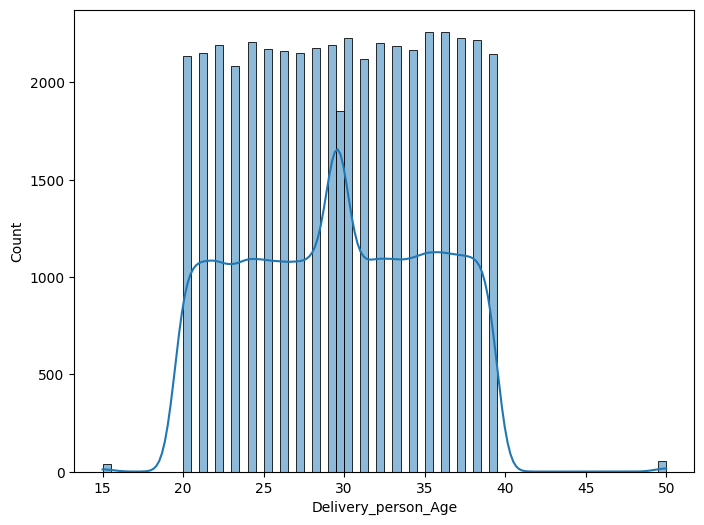

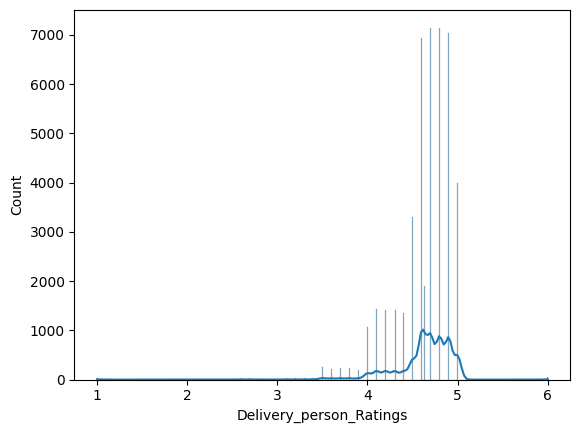

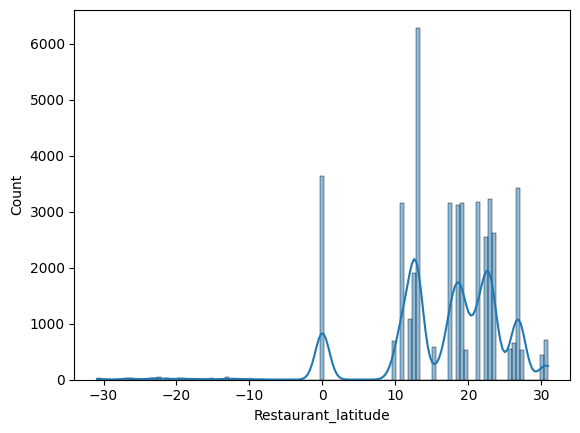

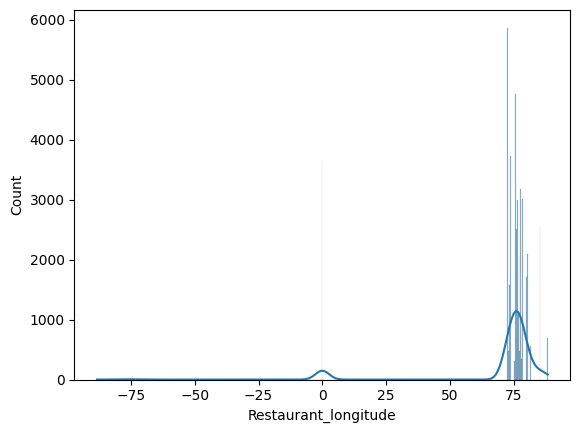

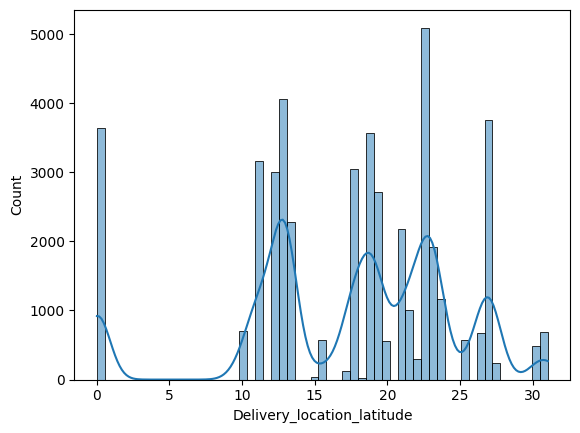

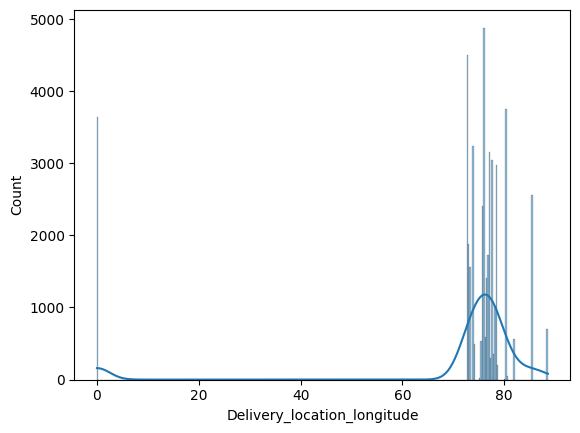

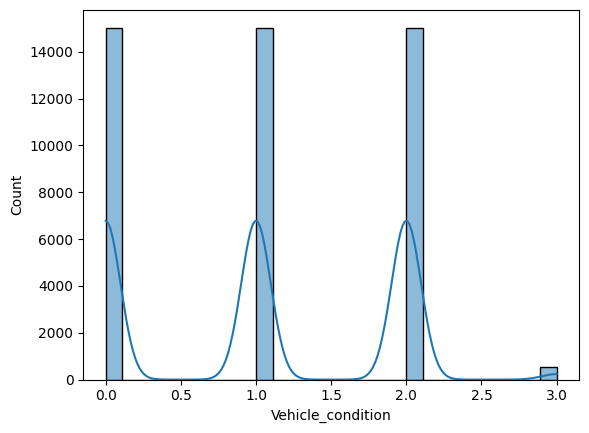

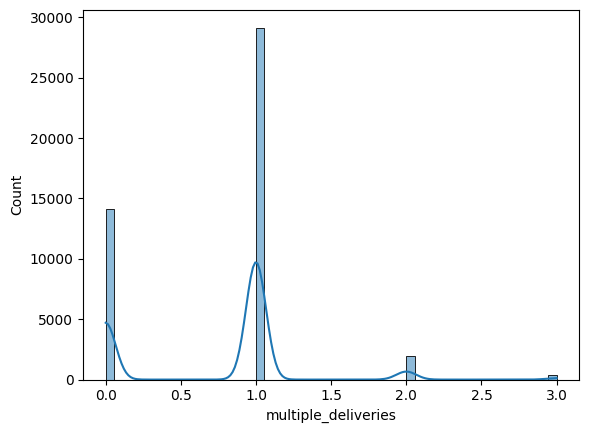

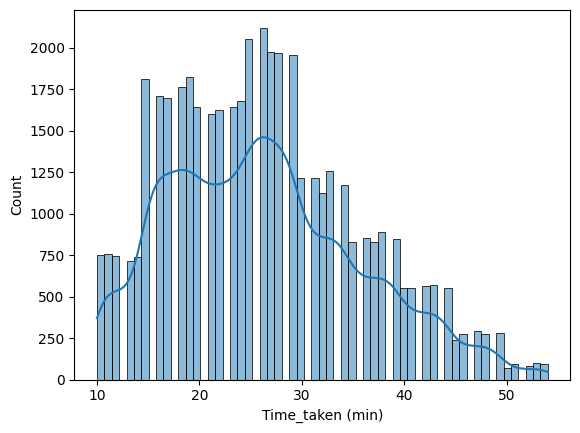

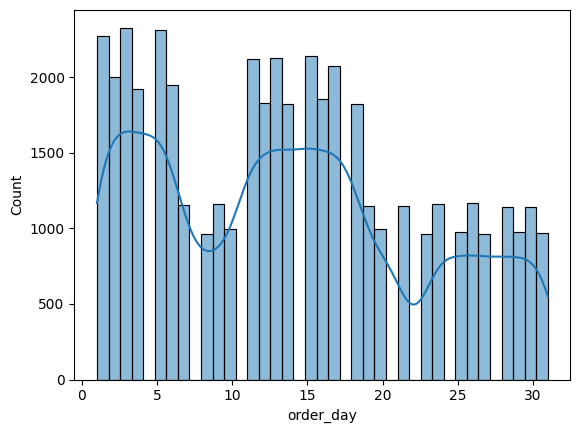

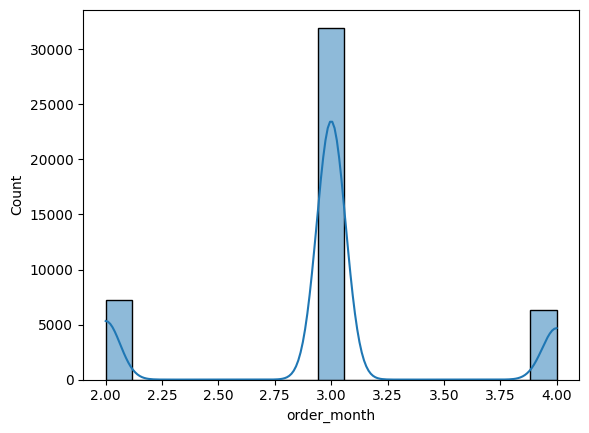

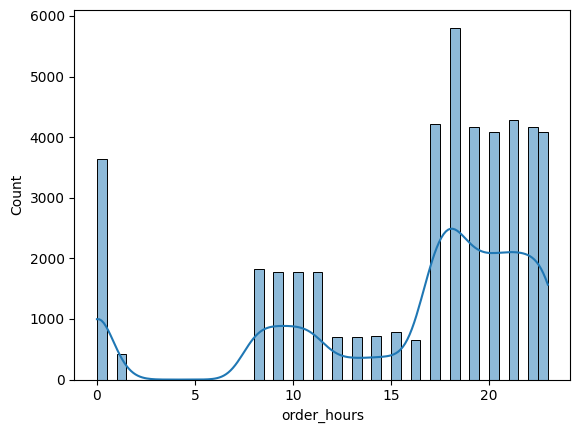

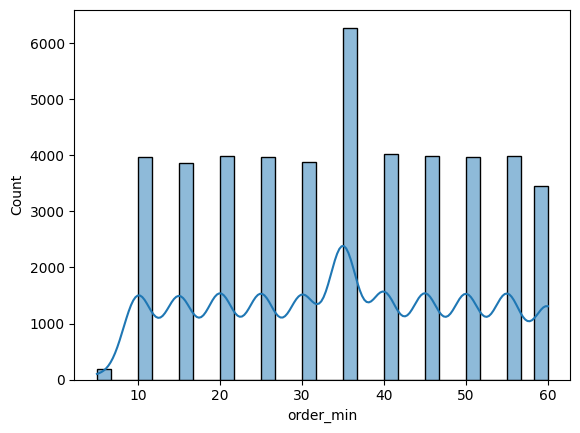

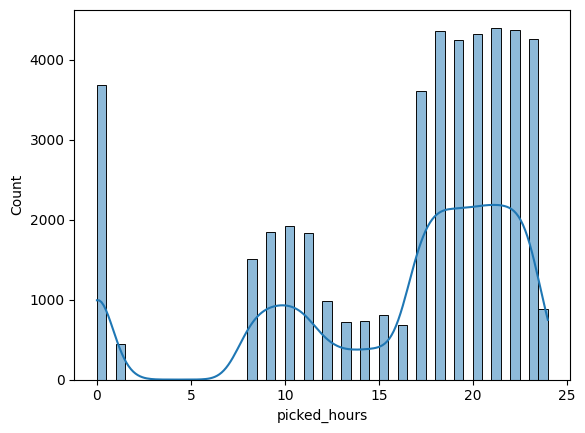

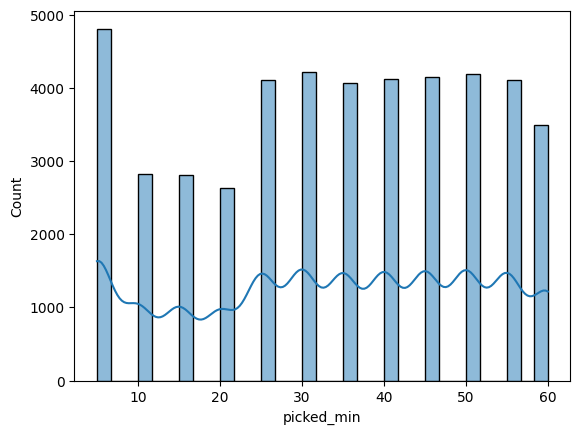

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_col:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

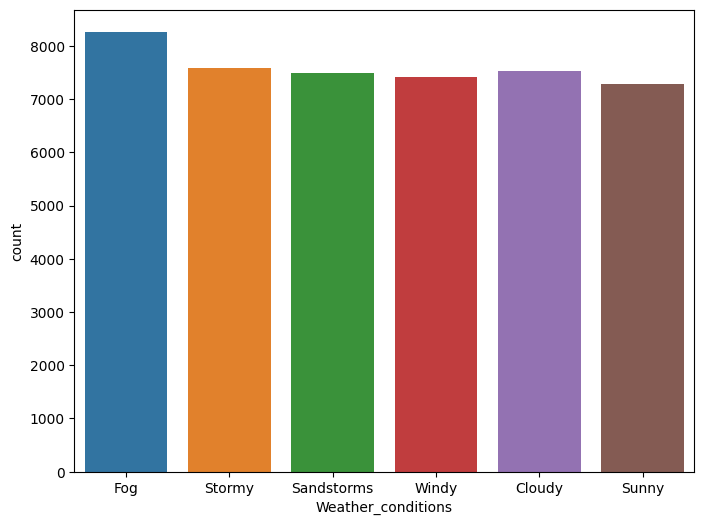

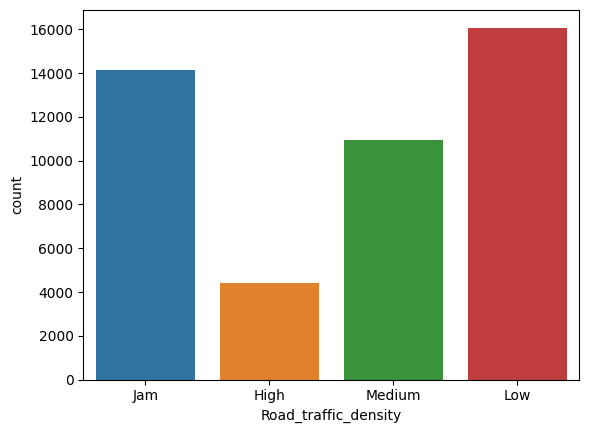

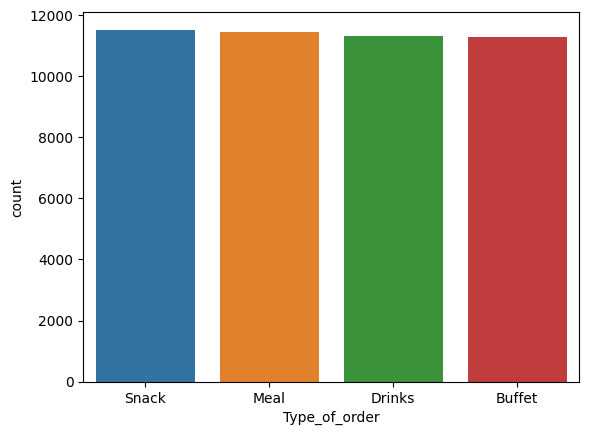

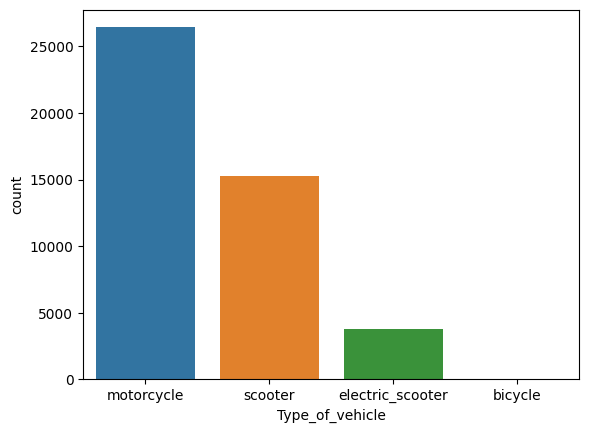

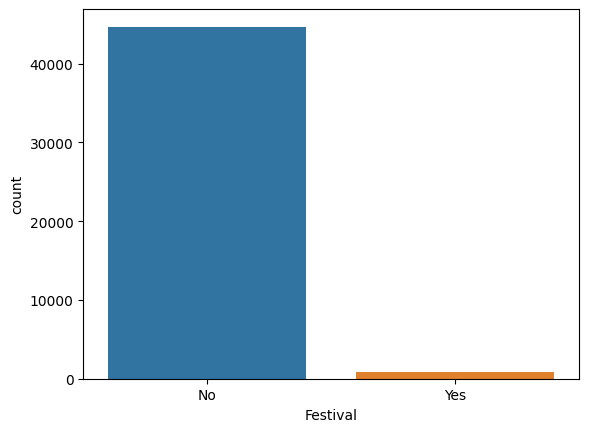

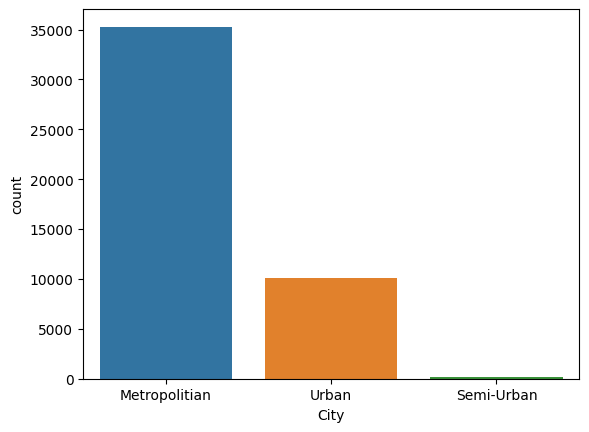

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_col:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [208]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'order_day', 'order_month', 'order_hours',
       'order_min', 'picked_hours', 'picked_min'],
      dtype='object')

In [211]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,order_hours,order_min,picked_hours,picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3.0,No,Metropolitian,46,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1.0,No,Metropolitian,23,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1.0,No,Metropolitian,21,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0.0,No,Metropolitian,20,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1.0,No,Metropolitian,41,14,2,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,0.0,No,Metropolitian,32,24,3,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,1.0,No,Metropolitian,36,16,2,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,0.0,No,Metropolitian,16,11,3,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,1.0,No,Metropolitian,26,7,3,13.0,35.0,13.0,40.0


In [212]:
#feature engineering
categorical_col

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [213]:
df["Weather_conditions"].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [214]:
df["Road_traffic_density"].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [215]:
df["Type_of_order"].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [216]:
df["Type_of_vehicle"].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [217]:
df["Festival"].unique()

array(['No', 'Yes'], dtype=object)

In [218]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [220]:
df["City"]=df["City"].map({'Semi-Urban':1,"Urban":2,"Metropolitian":3})
df["Festival"]=df["Festival"].map({"No":0,"Yes":1})
df["Type_of_vehicle"]=df["Type_of_vehicle"].map({"bicycle":1,"electric_scooter":2,"scooter":3,"motorcycle":4})
df["Type_of_order"]=df["Type_of_order"].map({'Snack':4, 'Meal':3, 'Drinks':1, 'Buffet':2})
df["Road_traffic_density"]=df["Road_traffic_density"].map({'Jam':1, 'High':2, 'Medium':3, 'Low':4})
df["Weather_conditions"]=df["Weather_conditions"].map({'Fog':2, 'Stormy':3, 'Sandstorms':1, 'Windy':4, 'Cloudy':5, 'Sunny':6})

In [221]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,order_hours,order_min,picked_hours,picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,1,2,4,...,3.0,0,3,46,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,3,2,1,3,...,1.0,0,3,23,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,3,1,1,...,1.0,0,3,21,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,1,4,0,2,...,0.0,0,3,20,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2,1,1,4,...,1.0,0,3,41,14,2,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,4,2,1,3,...,0.0,0,3,32,24,3,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,4,1,0,2,...,1.0,0,3,36,16,2,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,5,4,1,1,...,0.0,0,3,16,11,3,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,5,2,0,4,...,1.0,0,3,26,7,3,13.0,35.0,13.0,40.0


In [222]:
df.iloc[:,[-7]]

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [224]:
df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,order_hours,order_min,picked_hours,picked_min
Delivery_person_Age,1.000000,-0.067909,-0.004201,-0.008604,0.002452,-0.000497,0.005190,0.001115,0.003030,-0.003898,...,0.111179,0.057044,0.051885,0.292886,0.003110,-0.006977,0.005197,-0.008206,0.004013,0.001230
Delivery_person_Ratings,-0.067909,1.000000,-0.007251,-0.013044,-0.010137,-0.013284,0.035649,0.058393,0.033129,0.001396,...,-0.113153,-0.058091,-0.046304,-0.331137,-0.006570,-0.007955,-0.041050,0.002256,-0.037017,-0.001998
Restaurant_latitude,-0.004201,-0.007251,1.000000,0.661818,0.866369,0.602744,0.016556,-0.026564,-0.033576,-0.001880,...,0.007823,0.002979,0.007947,0.013970,0.000043,-0.030781,-0.006396,0.001088,0.004545,-0.000165
Restaurant_longitude,-0.008604,-0.013044,0.661818,1.000000,0.632335,0.915023,0.018419,-0.025938,-0.038734,-0.001705,...,0.004144,-0.005251,0.009521,0.007787,-0.001912,0.084327,-0.005772,0.002021,0.000055,0.000068
Delivery_location_latitude,0.002452,-0.010137,0.866369,0.632335,1.000000,0.690560,0.003719,-0.012383,-0.001629,-0.000275,...,0.009956,0.004031,0.006404,0.014234,0.002296,-0.074500,0.003684,0.003115,0.007686,0.000255
Delivery_location_longitude,-0.000497,-0.013284,0.602744,0.915023,0.690560,1.000000,0.003273,-0.007374,-0.001946,-0.002122,...,0.004634,-0.001025,0.009647,0.007590,-0.003325,0.087579,0.002265,0.002790,0.002073,-0.000181
Weather_conditions,0.005190,0.035649,0.016556,0.018419,0.003719,0.003273,1.000000,-0.012730,-0.022835,-0.009308,...,-0.030965,-0.004306,-0.023991,-0.099962,0.003576,-0.003752,-0.003888,-0.006859,0.000377,0.004675
Road_traffic_density,0.001115,0.058393,-0.026564,-0.025938,-0.012383,-0.007374,-0.012730,1.000000,0.020254,-0.000393,...,-0.155747,-0.118432,-0.051387,-0.411907,-0.015546,0.006495,-0.116995,-0.012367,-0.117233,-0.030830
Vehicle_condition,0.003030,0.033129,-0.033576,-0.038734,-0.001629,-0.001946,-0.022835,0.020254,1.000000,0.001836,...,-0.095547,-0.079098,-0.024280,-0.234456,0.001028,0.002328,0.008356,0.001986,0.005098,0.006512
Type_of_order,-0.003898,0.001396,-0.001880,-0.001705,-0.000275,-0.002122,-0.009308,-0.000393,0.001836,1.000000,...,-0.005417,0.003824,0.001736,0.005062,-0.004388,-0.005627,0.002317,0.007341,0.000533,-0.006350


In [224]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

KeyboardInterrupt: 